In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/predict-energy-behavior-of-prosumers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-energy-behavior-of-prosumers/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv
/kaggle/input/predict-energy-behavior-of-prosumers/public_timeseries_testing_util.py
/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/county_id_to_name_map.json
/kaggle/input/predict-energy-behavior-of-prosumers/train.csv
/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/sample_submission.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/electricity

In [2]:
import matplotlib.pyplot as plt

In [3]:
path = '/kaggle/input/predict-energy-behavior-of-prosumers/'
for file in os.listdir(path):
    if os.path.isfile(path + file):
        if file.endswith("csv"):
            temp_df = pd.read_csv(path + file)
            print(file)
            print(temp_df.head())
            print("-"*100)
        else: print(f"{file} not a csv.\n","-"*100)

client.csv
   product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2  
----------------------------------------------------------------------------------------------------
gas_prices.csv
  forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 

# Data Viz

In [4]:
train = pd.read_csv(path + 'train.csv')
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [5]:
# Example to visualize what train.csv represents
example = train[train['data_block_id']==0]
example

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2923,15,0,3,57.519,1,2021-09-01 23:00:00,0,2923,58
2924,15,1,1,0.000,0,2021-09-01 23:00:00,0,2924,59
2925,15,1,1,20.209,1,2021-09-01 23:00:00,0,2925,59
2926,15,1,3,0.000,0,2021-09-01 23:00:00,0,2926,60


In [6]:
# A unique combiniation of county, business, and product
example[example['prediction_unit_id']==0]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
122,0,0,1,1.132,0,2021-09-01 01:00:00,0,122,0
123,0,0,1,77.691,1,2021-09-01 01:00:00,0,123,0
244,0,0,1,0.490,0,2021-09-01 02:00:00,0,244,0
245,0,0,1,91.594,1,2021-09-01 02:00:00,0,245,0
366,0,0,1,0.496,0,2021-09-01 03:00:00,0,366,0
367,0,0,1,87.955,1,2021-09-01 03:00:00,0,367,0
488,0,0,1,0.149,0,2021-09-01 04:00:00,0,488,0
489,0,0,1,88.184,1,2021-09-01 04:00:00,0,489,0


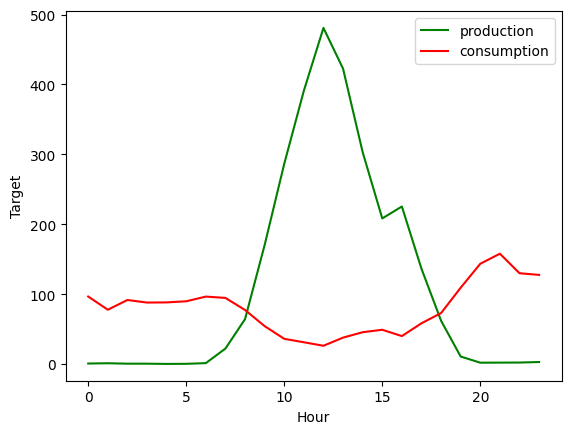

In [7]:
production = example[(example['prediction_unit_id']==0) & (example['is_consumption']==0)]['target']
consumption = example[(example['prediction_unit_id']==0) & (example['is_consumption']==1)]['target']
time = example[(example['prediction_unit_id']==0) & (example['is_consumption']==0)]['datetime']
time = [i for i, _ in enumerate(time)]
plt.plot(time, production, label = "production", c = "green")
plt.plot(time, consumption, label = "consumption", c = "red")
plt.xlabel("Hour")
plt.ylabel("Target")
plt.legend()